<img src="https://www.jacadatravel.com/wp-content/uploads/fly-images/322921/new-zealand-mount-cook-in-the-background-1600x500-cc.jpg" width="1000px">

New Zealand (Māori: Aotearoa [aɔˈtɛaɾɔa]) is a sovereign island country in the southwestern Pacific Ocean. The country has two main landmasses—the North Island (Te Ika-a-Māui), and the South Island (Te Waipounamu)—and around 600 smaller islands. It has a total land area of 268,000 square kilometres (103,500 sq mi). New Zealand is about 2,000 kilometres (1,200 mi) east of Australia across the Tasman Sea and 1,000 kilometres (600 mi) south of the Pacific island areas of New Caledonia, Fiji, and Tonga. Because of its remoteness, it was the last large habitable land to be settled by humans. During its long period of isolation, New Zealand developed a distinct biodiversity of animal, fungal, and plant life. The country's varied topography and its sharp mountain peaks, such as the Southern Alps, owe much to the tectonic uplift of land and volcanic eruptions. New Zealand's capital city is Wellington, and its most populous city is Auckland.

In [98]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


## EDA(Exploratory data analysis)

data.head() displays first 5 rows of the data

In [109]:
data = pd.read_csv('/kaggle/input/new-zealand-citizenships-19492019/granted-citizenship-1949-2019.csv')
data.head(), 

,Country of Birth,Total,%,1949,1950,1951,1952,1953,1954,1955,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aden,25,0.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
1,Afghanistan,3499,0.38%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.0,48.0,136.0,79.0,117.0,103.0,64.0,137.0,305.0,255.0
2,Albania,144,0.02%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,6.0,10.0,1.0,4.0,8.0,2.0,1.0,3.0,2.0
3,Algeria,241,0.03%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,6.0,5.0,7.0,12.0,5.0,7.0,6.0,4.0
4,American Samoa,862,0.09%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.0,36.0,58.0,48.0,44.0,51.0,48.0,40.0,58.0,45.0


In [110]:
data.rename(columns={'Country of Birth':'Country', '%':'Percentage'}, inplace=True)
data.columns

Index(['Country', 'Total', 'Percentage', '1949', '1950', '1951', '1952',
       '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019'],
      dtype='object')

In [111]:
data.set_index('Country', inplace=True)


In [102]:
years = list(map(str, range(1949, 2020)))
years

['1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [113]:
import matplotlib as mpl
import matplotlib.pyplot as plt

print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# Let's look at the trend for indian immigrants

In [114]:
india = data.loc['India', years] # passing in years 1980 - 2013 to exclude the 'total' column
india

1949     320
1950      21
1951      28
1952      17
1953      25
        ... 
2015    2395
2016    3339
2017    4665
2018    4845
2019    4680
Name: India, Length: 71, dtype: object

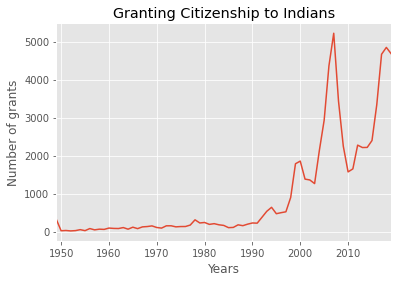

In [115]:
india.index = india.index.map(int) # let's change the index values of Haiti to type integer for plotting
india.plot(kind='line',)
plt.title('Granting Citizenship to Indians')
plt.ylabel('Number of grants')
plt.xlabel('Years')
plt.show() 

According to the line graph, the yield of the grant sore from the year 1990 onwards. Further analysis is required to ascertain why this trend had begun.

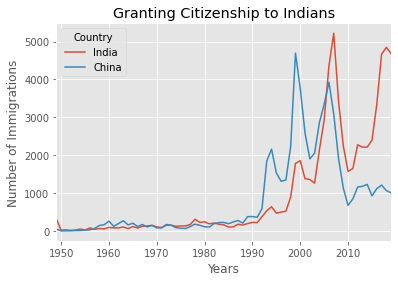

In [116]:
df = data.loc[['India','China'],years]
df = df.transpose()
### type your answer here
df.index = df.index.map(int)
df.plot(kind='line')
plt.title('Granting Citizenship to Indians')
plt.ylabel('Number of Immigrations')
plt.xlabel('Years')
plt.show()

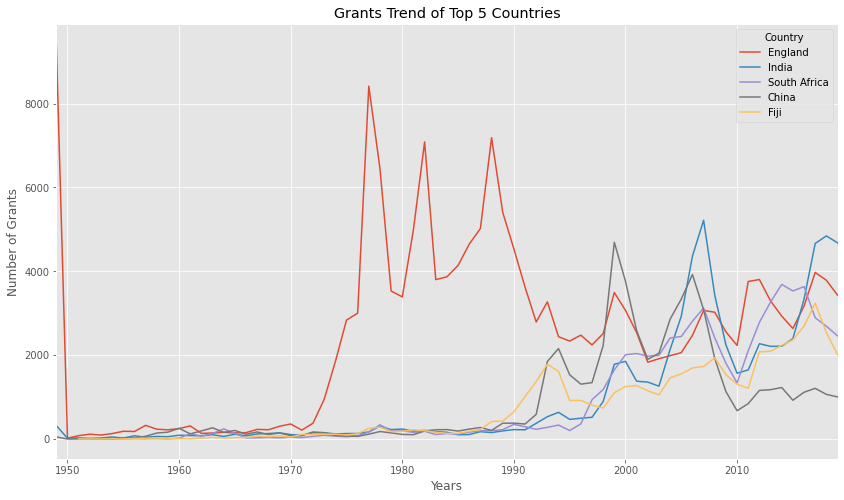

In [127]:
top_5 = data.sort_values(by = 'Total', ascending = False, axis = 0)

df_top5 = top_5.head(6)[1:]
df_top5 = df_top5[years].transpose()
 
# print(df_top5)
 
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line', figsize=(14,8))
 
plt.title('Grants Trend of Top 5 Countries')
plt.ylabel('Number of Grants')
plt.xlabel('Years')
plt.show()

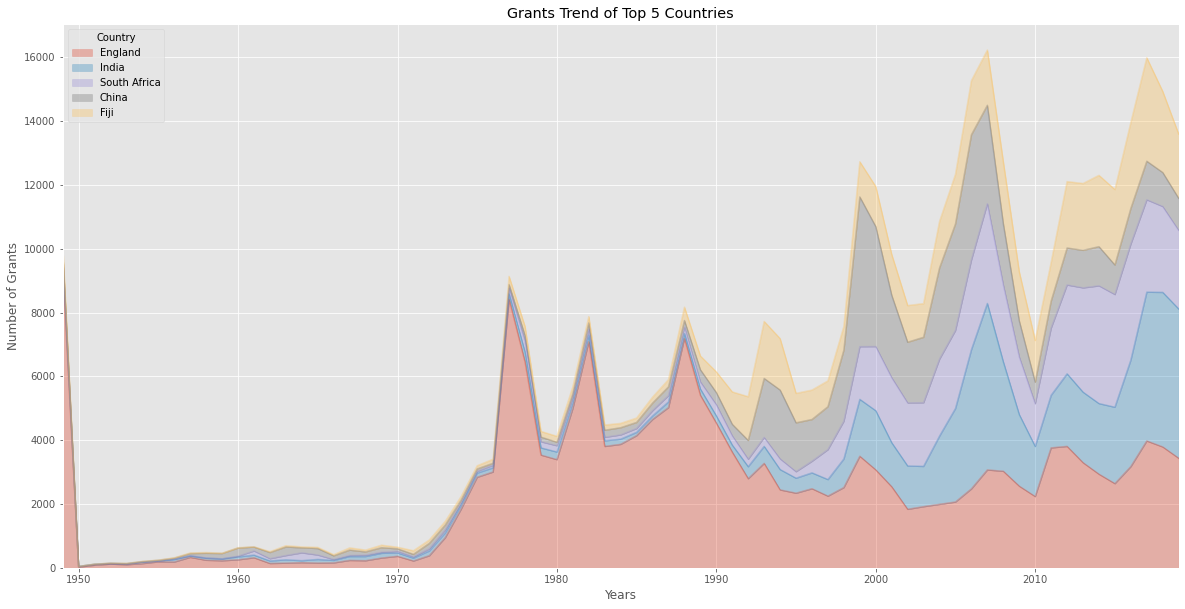

In [131]:
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Grants Trend of Top 5 Countries')
ax.set_ylabel('Number of Grants')
ax.set_xlabel('Years');

In [138]:
data.sort_values(['Total'], ascending = True, axis = 0)

#get the top5 entries
df_least5 = data.head(10)

#transpose the dataframe
df_least5 = df_least5[years].transpose()

df_least5.head()

Country,Aden,Afghanistan,Albania,Algeria,American Samoa,Angola,Anguilla,Antigua and Barbuda,Argentina,Argentine
1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN
1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


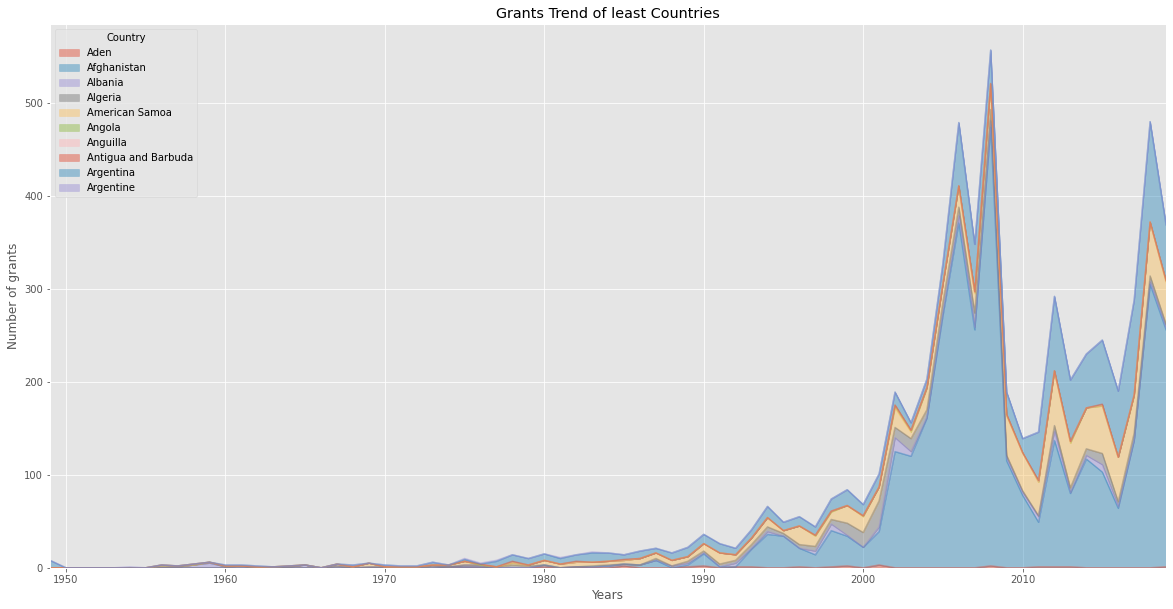

In [140]:
df_least5.index = df_least5.index.map(int)#change the index value to type integer
df_least5.plot(kind='area', 
             alpha=0.45, # 0-1, default value a= 0.5
             stacked=True,
             figsize=(20, 10),
            )

plt.title('Grants Trend of least Countries')
plt.ylabel('Number of grants')
plt.xlabel('Years')

plt.show()

In [149]:
# let's quickly view the 2019 data
data.sort_values(['Total'], ascending = False, axis = 0, inplace = True)

data['2019'].head(10)

Country
TOTAL            31030.0
England           3433.0
India             4680.0
South Africa      2463.0
China             1006.0
Fiji              2013.0
Western Samoa       43.0
Philippines       2555.0
Samoa             2770.0
Scotland           354.0
Name: 2019, dtype: float64

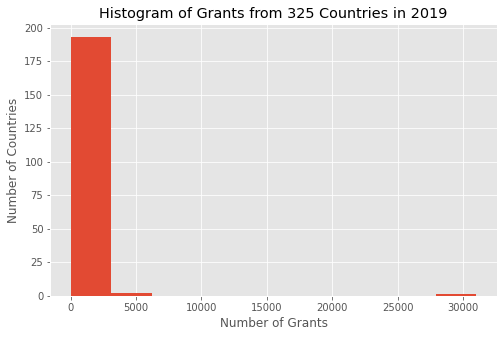

In [148]:
data['2019'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Grants from 325 Countries in 2019') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Grants') # add x-label

plt.show()

In [163]:
df_t = data.loc[['England', 'India',  'China', 'Fiji'], years].transpose()
df_t.head()

Country,England,India,China,Fiji
1949,9429.0,320.0,51.0,221.0
1950,21.0,21.0,1.0,NaN
1951,81.0,28.0,3.0,4.0
1952,116.0,17.0,4.0,3.0
1953,96.0,25.0,10.0,4.0


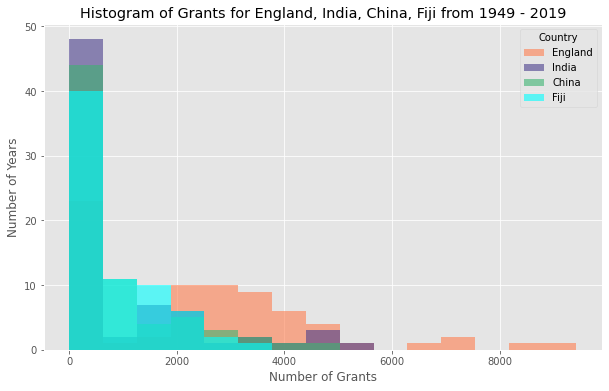

In [165]:
# count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          color=['coral', 'darkslateblue', 'mediumseagreen','cyan',]
         )

plt.title('Histogram of Grants for England, India, China, Fiji from 1949 - 2019')
plt.ylabel('Number of Years')
plt.xlabel('Number of Grants')

plt.show()

In [172]:
df_eng = data.loc['England', years]
df_ind = data.loc['India', years]
df_sou = data.loc['South Africa', years]
df_fiji = data.loc['Fiji', years]
df_china = data.loc['China', years]
df_west = data.loc['Western Samoa', years]
df_phil = data.loc['Philippines', years]



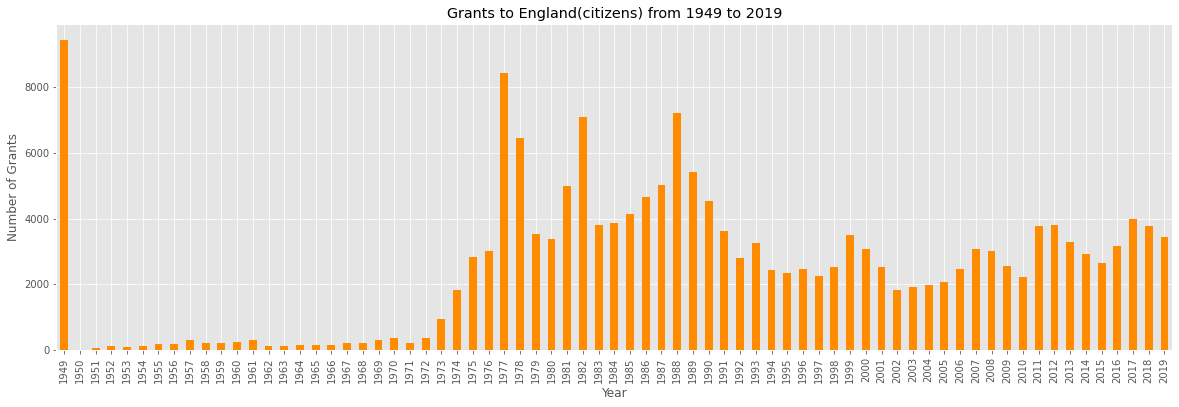

In [198]:
df_eng.plot(kind='bar', figsize=(20, 6), color = 'darkorange')

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of Grants') # add y-label to the plot
plt.title('Grants to England(citizens) from 1949 to 2019') # add title to the plot

plt.show()

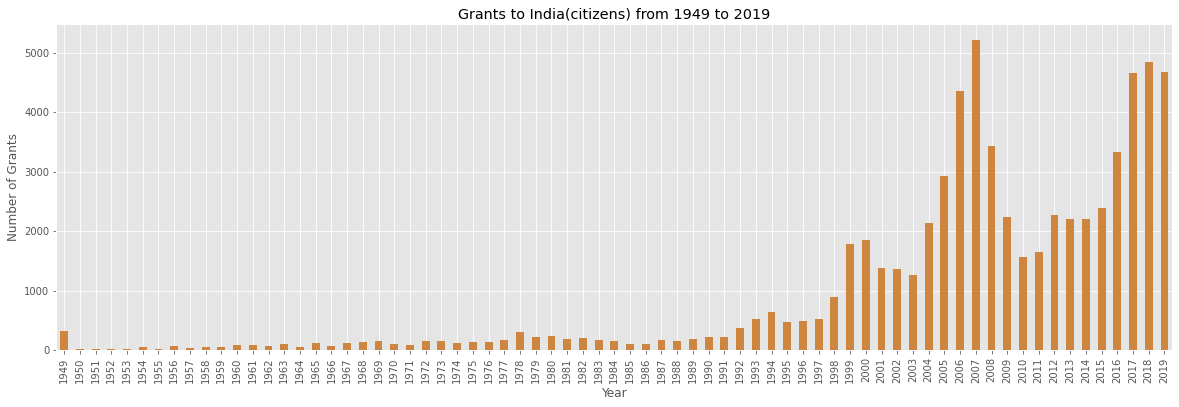

In [197]:
df_ind.plot(kind='bar', figsize=(20, 6), color = 'peru')

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of Grants') # add y-label to the plot
plt.title('Grants to India(citizens) from 1949 to 2019') # add title to the plot

plt.show()

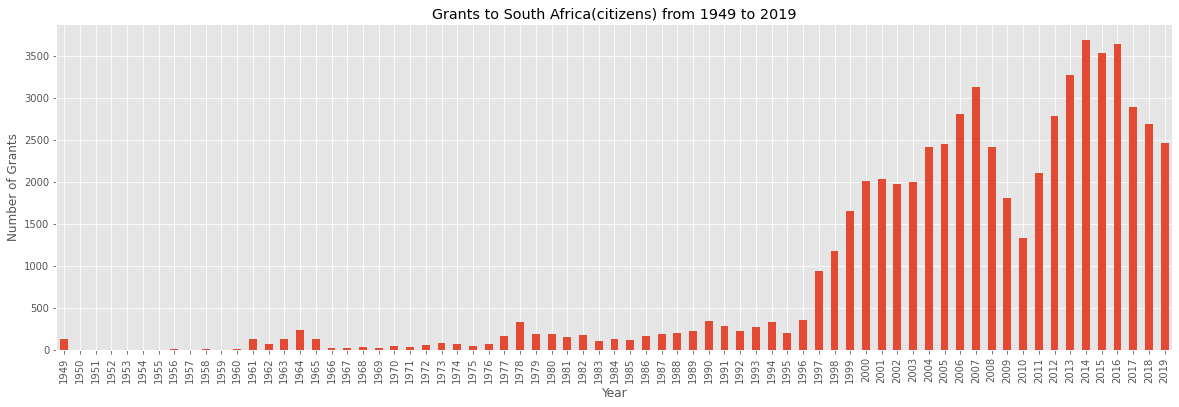

In [195]:
df_sou.plot(kind='bar', figsize=(20, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of Grants') # add y-label to the plot
plt.title('Grants to South Africa(citizens) from 1949 to 2019') # add title to the plot

plt.show()


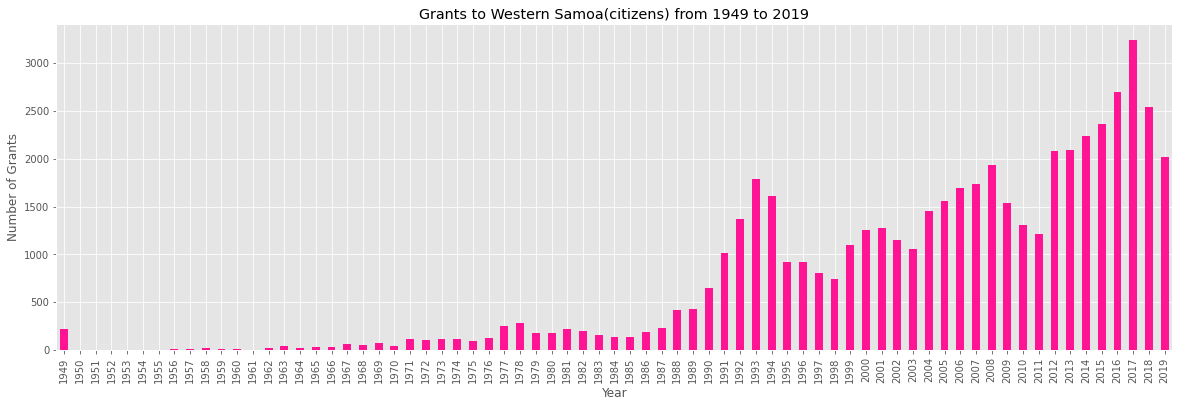

In [194]:
df_fiji.plot(kind='bar', figsize=(20, 6), color = 'deeppink')

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of Grants') # add y-label to the plot
plt.title('Grants to Western Samoa(citizens) from 1949 to 2019') # add title to the plot


plt.show()

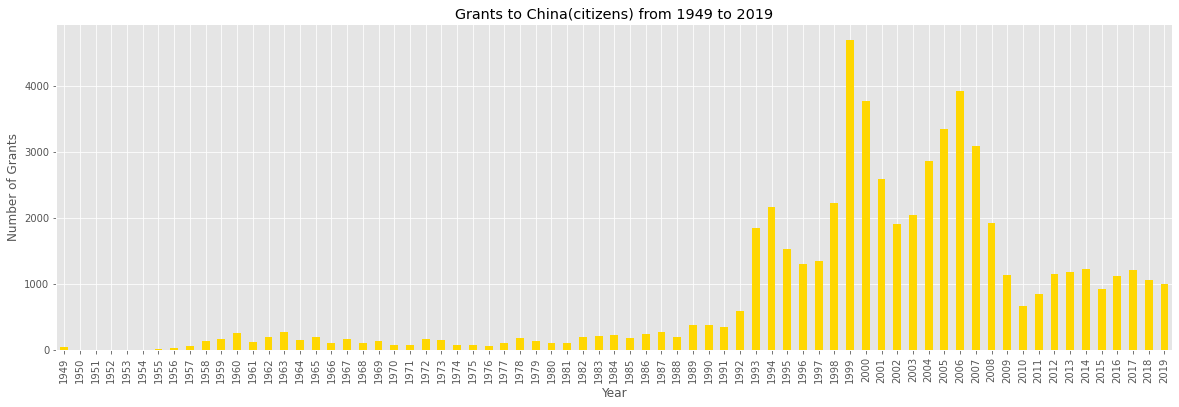

In [193]:
df_china.plot(kind='bar', figsize=(20, 6), color = 'gold')

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of Grants') # add y-label to the plot
plt.title('Grants to China(citizens) from 1949 to 2019') # add title to the plot

plt.show()
 # add title to the plot

plt.show()

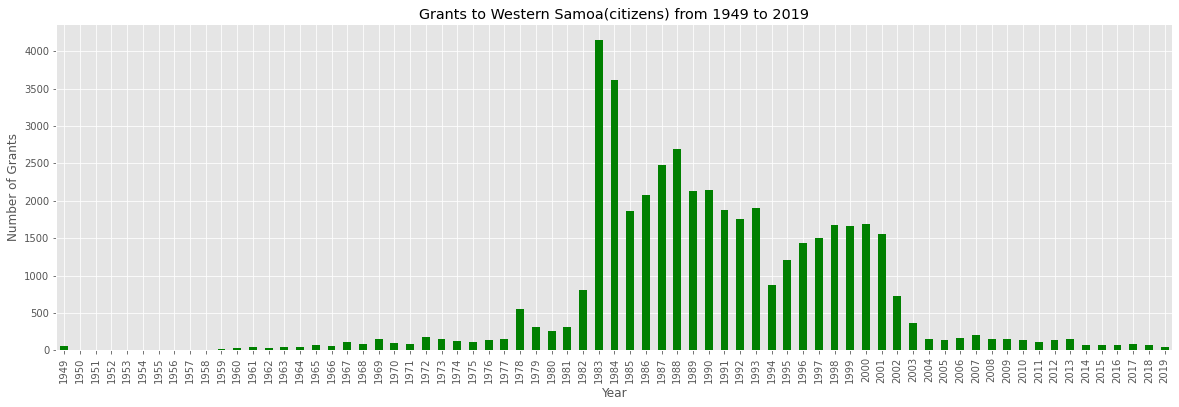

In [191]:
df_west.plot(kind='bar', figsize=(20, 6), color = 'g')

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of Grants') # add y-label to the plot
plt.title('Grants to Western Samoa(citizens) from 1949 to 2019') # add title to the plot

plt.show()


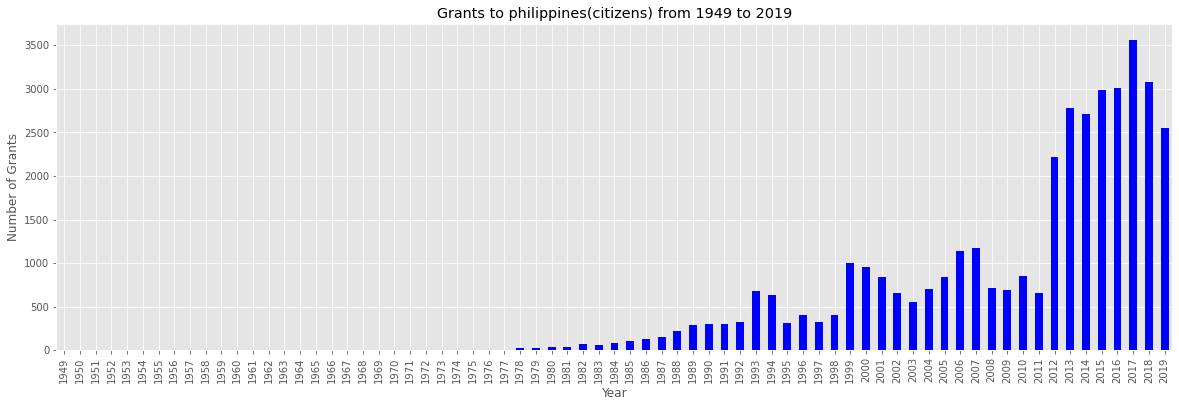

In [188]:
df_phil.plot(kind='bar', figsize=(20, 6), color = 'b')

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of Grants') # add y-label to the plot
plt.title('Grants to philippines(citizens) from 1949 to 2019') # add title to the plot

plt.show()